## Mission: 가즈아!

서울의 소시민 나일론 마스크는 요즘 가상화폐에 푹 빠져있다. 매일매일 극락과 지옥을 오가는 매운맛에 정신을 못 차리고 있는데, 그의 친구인 호주니는 그에게 정신차리게 하기 위해 비트코인 광풍이 일었던 2017년 한 해의 가격의 변화를 보여주려고 한다. 그런데 매일매일의 데이터를 보여주는 것보다 이것의 추세를 표현해주면 좋겠다는 생각이 들어 **Moving Average(이동평균법)** 를 도입하고자 한다. 호주니를 도와 마스크씨를 설득해보자.

### Core Mission

[다음 데이터](https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015)가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.

- 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.
💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

In [286]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

bitcoin = pd.read_csv("./BitCoin.csv")
bitcoin.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [287]:
bitcoin.Date.dtypes

dtype('O')

In [289]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'],infer_datetime_format = True)
bitcoin

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
...,...,...,...,...,...,...,...,...
1604,1604,2013-02-05,116.38,125.60,92.28,105.21,6.722784e+06,1292190000
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000


In [290]:
# 구글링 month day switch

def calendario(fecha):
    
    if fecha.day < 13:
        dia_real = fecha.month
        mes_real = fecha.day
        
        if dia_real < 10:
            dia_real = '0'+str(dia_real)
        
        nfecha = str(dia_real) + str(mes_real) + str(fecha.year)
        nfecha = pd.to_datetime(nfecha, format='%d%m%Y', errors='ignore')
        
    else:
        nfecha = fecha
    
    return nfecha

bitcoin['Date']=bitcoin['Date'].apply(calendario)
bitcoin["5-ma"] = 0
bitcoin

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,5-ma
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000,0
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000,0
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000,0
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000,0
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000,0
...,...,...,...,...,...,...,...,...,...
1604,1604,2013-05-02,116.38,125.60,92.28,105.21,6.722784e+06,1292190000,0
1605,1605,2013-05-01,139.00,139.89,107.72,116.99,8.026719e+06,1542820000,0
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000,0
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000,0


In [292]:
list1 = []
for i in range(84,479):
    sum1 = 0 
    mean = 0
    for j in range(5):
        sum1 += bitcoin["Open"].iloc[i+j]
    mean = sum1/5
    bitcoin.at[i,"5-ma"] = mean
    
bitcoin

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,5-ma
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000,0
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000,0
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000,0
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000,0
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000,0
...,...,...,...,...,...,...,...,...,...
1604,1604,2013-05-02,116.38,125.60,92.28,105.21,6.722784e+06,1292190000,0
1605,1605,2013-05-01,139.00,139.89,107.72,116.99,8.026719e+06,1542820000,0
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000,0
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000,0


In [293]:
# 오브젝트형 날짜 데이터 날짜로 바꾸기 및 데이터 전처리 과정

filter1 = (bitcoin['Date'] >= '2016-06-01') & (bitcoin["Date"] <= '2017-06-30')
filtered_df = bitcoin.loc[filter1]
filtered_df = filtered_df.sort_values(by = ["Date"],ascending = True)
filtered_df
 

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,5-ma
478,478,2016-06-01,531.11,543.08,525.64,536.92,8.606180e+07,8288680000,518
477,477,2016-06-02,536.51,540.35,533.08,537.97,6.037820e+07,8375000000,531
476,476,2016-06-03,537.68,574.64,536.92,569.19,1.220200e+08,8395070000,533
475,475,2016-06-04,569.71,590.13,564.24,572.73,9.492530e+07,8897080000,541
474,474,2016-06-05,573.31,582.81,569.18,574.98,6.887410e+07,8955060000,549
...,...,...,...,...,...,...,...,...,...
88,88,2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000,2666
87,87,2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000,2624
86,86,2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000,2593
85,85,2017-06-29,2567.56,2588.83,2510.48,2539.32,9.499790e+08,42150300000,2559


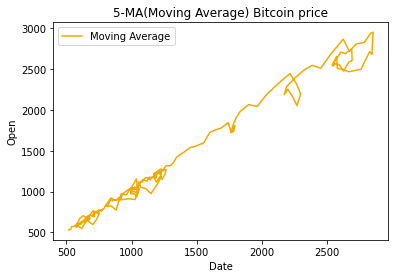

In [294]:
x = filtered_df["5-ma"]
y = filtered_df["Open"]
plt.xlabel("Date")
plt.ylabel("Open")
plt.yticks()
plt.title("5-MA(Moving Average) Bitcoin price")
plt.plot(x,y,label = "Moving Average",color = "#f2a900")
plt.legend(loc ="best")
plt.show()

### Bonus Mission
해당 그래프를 본 나일론 마스크씨는 정신을 차렸다. 정확히는 비트코인만 바라본 본인을 말이다. 정말 많은 가상화폐가 있는데 비트코인만 바라본 본인을 돌아보게 되었다. 더불어 가장 핫한 코인인 이더리움 또한 관심이 생겼는데, 마스크씨는 2017년 한 해에 이 두개의 추세를 비교하고싶어 한다. 마스크씨를 도와 비트코인과 이더리움의 가격 추세 비교를 도와주자.

위에 주어진 데이터와 더불어 [다음 데이터](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.

- 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [68]:
ethereum = pd.read_csv("./ETH_day.csv")
ethereum.head()

# 오브젝트형 날짜 데이터 날짜로 바꾸기 및 데이터 전처리 과정

ethereum['Date'] = pd.to_datetime(ethereum['Date'],infer_datetime_format = True)

filter2 = (ethereum['Date'] >= '2016-06-01') & (ethereum["Date"] <= '2017-06-30')

filtered_df2 = ethereum.loc[filter2]
filtered_df2 = filtered_df2.sort_values(by = ["Date"],ascending = True)
filtered_df2
 

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67
...,...,...,...,...,...,...,...,...
1024,2017-06-26,ETHUSD,278.73,299.90,210.00,253.00,249076.24,60950252.99
1023,2017-06-27,ETHUSD,253.00,288.17,210.02,286.21,173179.40,42085473.60
1022,2017-06-28,ETHUSD,286.21,324.95,260.49,317.59,184030.56,54573461.77
1021,2017-06-29,ETHUSD,317.59,322.84,285.23,293.80,152271.32,46521350.06


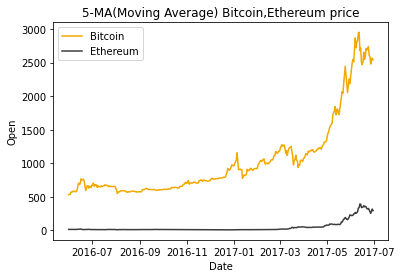

In [69]:
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("5-MA(Moving Average) Bitcoin,Ethereum price")
plt.plot(filtered_df["Date"],filtered_df["Open"],label = "Bitcoin",color = "#f2a900")
plt.plot(filtered_df2["Date"],filtered_df2["Open"],label = "Ethereum",color = "#3c3c3d")
plt.legend(loc ="best")
plt.show()